# **BACKPROPAGATION**

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [3]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [ ]:
np.ones()

In [4]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [6]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b
  
  return Z

In [7]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev

In [8]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [9]:
y_hat

array([[0.32]])

In [10]:
A1

array([[1.6],
       [1.6]])

In [11]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [12]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [13]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[1][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10753323, 0.10968558],
        [0.10753323, 0.10968558]]),
 'b1': array([[0.00107618],
        [0.00107618]]),
 'W2': array([[0.114976],
        [0.114976]]),
 'b2': array([[0.124336]])}

In [14]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[2][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10805488, 0.11342479],
        [0.10805488, 0.11342479]]),
 'b1': array([[0.00134248],
        [0.00134248]]),
 'W2': array([[0.118176],
        [0.118176]]),
 'b2': array([[0.129536]])}

In [18]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 6

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962
Epoch -  6 Loss -  1.1726178458115697


{'W1': array([[0.26628395, 0.3978842 ],
        [0.27952594, 0.4243817 ]]),
 'b1': array([[0.02826156],
        [0.03066415]]),
 'W2': array([[0.41973268],
        [0.49530113]]),
 'b2': array([[0.49808206]])}

In [39]:
import numpy as np
import pandas as pd

# Data
df = pd.DataFrame([[8,8,4],
                   [7,9,5],
                   [6,10,6],
                   [5,12,7]], 
                   columns=['cgpa', 'profile_score', 'lpa'])

# ---------- Initialize Parameters ----------
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

# ---------- Forward Propagation ----------
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    return Z

def L_layer_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        Z = linear_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)])
        A = sigmoid(Z)
        caches.append((A_prev, parameters['W'+str(l)], parameters['b'+str(l)], Z))

    # output layer (no activation or use sigmoid)
    ZL = linear_forward(A, parameters['W'+str(L)], parameters['b'+str(L)])
    AL = ZL  # linear output for regression
    caches.append((A, parameters['W'+str(L)], parameters['b'+str(L)], ZL))

    return AL, caches

# ---------- Backward Propagation ----------
def linear_backward(dZ, cache):
    A_prev, W, b, Z = cache
    m = A_prev.shape[1]
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

def L_layer_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    # dAL = -2 * (Y - AL)  # MSE loss derivative
    dAL = -2 * (Y - AL)   # d(Loss)/dAL

    # Output layer
    current_cache = caches[L-1]
    dZL = dAL  # since output layer is linear
    dA_prev, dW, db = linear_backward(dZL, current_cache)
    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db
    grads["dA" + str(L-1)] = dA_prev

    # Hidden layers
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dZ = grads["dA" + str(l+1)] * sigmoid_derivative(current_cache[3])
        dA_prev, dW, db = linear_backward(dZ, current_cache)
        grads["dW" + str(l+1)] = dW
        grads["db" + str(l+1)] = db
        grads["dA" + str(l)] = dA_prev

    return grads

# ---------- Parameter Update ----------
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L+1):
        parameters['W' + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads["db" + str(l)]
    return parameters

# ---------- Training ----------
def train_model(X, Y, layer_dims, learning_rate=0.01, epochs=5000):
    parameters = initialize_parameters(layer_dims)
    loss_list = []
    for i in range(epochs):
        AL, caches = L_layer_forward(X, parameters)
        loss = np.mean((Y - AL)**2)

        grads = L_layer_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        print(f"Epoch {i}, Loss: {loss:.4f}")
        loss_list.append(loss)
    return parameters,loss_list

In [43]:
# ---------- Run ----------
X = df[['cgpa', 'profile_score']].values.T  # shape (features, samples)
Y = df[['lpa']].values.T

layer_dims = [2, 3, 2, 1]  # 2-input → 3-hidden → 2-hidden → 1-output
params,loss = train_model(X, Y, layer_dims, learning_rate=0.01, epochs=1000)

Epoch 0, Loss: 30.1076
Epoch 1, Loss: 28.4072
Epoch 2, Loss: 26.7986
Epoch 3, Loss: 25.2751
Epoch 4, Loss: 23.8307
Epoch 5, Loss: 22.4603
Epoch 6, Loss: 21.1595
Epoch 7, Loss: 19.9241
Epoch 8, Loss: 18.7506
Epoch 9, Loss: 17.6358
Epoch 10, Loss: 16.5766
Epoch 11, Loss: 15.5705
Epoch 12, Loss: 14.6149
Epoch 13, Loss: 13.7076
Epoch 14, Loss: 12.8464
Epoch 15, Loss: 12.0295
Epoch 16, Loss: 11.2552
Epoch 17, Loss: 10.5220
Epoch 18, Loss: 9.8285
Epoch 19, Loss: 9.1737
Epoch 20, Loss: 8.5563
Epoch 21, Loss: 7.9755
Epoch 22, Loss: 7.4304
Epoch 23, Loss: 6.9199
Epoch 24, Loss: 6.4432
Epoch 25, Loss: 5.9991
Epoch 26, Loss: 5.5865
Epoch 27, Loss: 5.2040
Epoch 28, Loss: 4.8504
Epoch 29, Loss: 4.5241
Epoch 30, Loss: 4.2239
Epoch 31, Loss: 3.9480
Epoch 32, Loss: 3.6951
Epoch 33, Loss: 3.4637
Epoch 34, Loss: 3.2523
Epoch 35, Loss: 3.0594
Epoch 36, Loss: 2.8837
Epoch 37, Loss: 2.7240
Epoch 38, Loss: 2.5788
Epoch 39, Loss: 2.4471
Epoch 40, Loss: 2.3277
Epoch 41, Loss: 2.2196
Epoch 42, Loss: 2.1219
Epo

In [38]:
loss

np.float64(1.2433022133387805)

In [34]:
import matplotlib.pyplot as plt

In [36]:
loss

np.float64(1.2433022133387805)

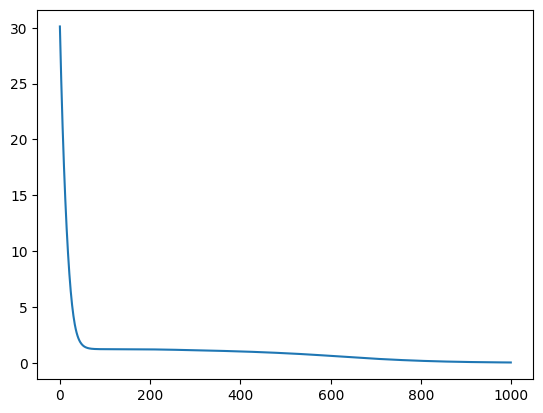

In [44]:
plt.plot(loss)